# Wine Tasting Dataset (Kaggle - Maven Analytics)

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing dataset to do some EDA:
wines = pd.read_csv("dataset_wine_enthusiast.csv")

In [3]:
# Dropping NaN values from columns "country", "price" and "variety":
wines_cleaned = wines.dropna(subset=["country", "price", "variety"])

In [4]:
# Renaming column "price" to "price_usd":
wines_cleaned.rename(columns={"price":"price_usd"}, inplace=True)

In [5]:
# Dropping column "id":
wines_cleaned = wines_cleaned.drop(columns=["id", "designation"])

In [6]:
""" list_country = wines_cleaned["country"].unique().tolist()
list_country """

' list_country = wines_cleaned["country"].unique().tolist()\nlist_country '

In [7]:
# Calculating weights of countries:
weights_country = wines_cleaned["country"].value_counts() / len(wines_cleaned["country"]) * 100

# Defining a threshold (1%):
threshold_country = 1

# Dropping rows where "country" has a weight below the previous threshold (1%):
# aka
# Keeping rows where "country" has a weight above the previous threshold (1%):
wines_cleaned = wines_cleaned[wines_cleaned["country"].map(weights_country) >= threshold_country]  

In [8]:
# Standardizing wine varieties: 
variety_dict = {
    "Alvarinho":"Albariño",
    "Bonarda":"Bonarda Piemontese", 
    "Cabernet Sauvignon-Carmenère":"Cabernet Sauvignon-Carménère", "Carmenère-Cabernet Sauvignon":"Cabernet Sauvignon-Carménère",
    "Malbec-Cabernet Sauvignon":"Cabernet Sauvignon-Malbec",
    "Merlot-Cabernet Sauvignon":"Cabernet Sauvignon-Merlot",
    "Cabernet Sauvignon-Shiraz":"Cabernet Sauvignon-Syrah", "Cabernet-Syrah":"Cabernet Sauvignon-Syrah", "Shiraz-Cabernet Sauvignon":"Cabernet Sauvignon-Syrah",
    "Syrah-Cabernet":"Cabernet Sauvignon-Syrah", "Syrah-Cabernet Sauvignon":"Cabernet Sauvignon-Syrah",
    "Tempranillo-Cabernet Sauvignon":"Cabernet Sauvignon-Tempranillo",
    "Carignan":"Carignan/Mazuelo", "Carignane":"Carignan/Mazuelo", "Carignano":"Carignan/Mazuelo", "Mazuelo":"Carignan/Mazuelo",
    "Carmenère":"Carménère",
    "Friulano":"Sauvignonasse/Friulano",
    "Alicante Bouschet":"Alicante Bouschet/Garnacha Tintorera",
    "Greco":"Grechetto",
    "Glera":"Glera/Prosecco", "Prosecco":"Glera/Prosecco",
    "Garnacha":"Grenache",
    "Garnacha Blanca":"Grenache Blanc",
    "Melon":"Melon De Bourgogne",
    "Monastrell":"Mourvèdre/Monastrell","Mourvèdre":"Mourvèdre/Monastrell",
    "Moscato":"Muscat Blanc à Petits Grains", "Moscato Giallo":"Muscat Blanc à Petits Grains", "Muscat":"Muscat Blanc à Petits Grains", "Muscat Blanc":"Muscat Blanc à Petits Grains",
    "Insolia":"Muscat of Alexandria", "Inzolia":"Muscat of Alexandria", "Moscatel":"Muscat of Alexandria", "Moscatel de Alejandría":"Muscat of Alexandria", "Muscat d'Alexandrie":"Muscat of Alexandria",
    "Muskat":"Muscat of Alexandria", "Zibibbo":"Muscat of Alexandria",
    "Nero d'Avola":"Nero D'Avola",
    "Gros and Petit Manseng":"Petit Manseng",
    "Durif":"Petite Sirah/Durif", "Petite Sirah":"Petite Sirah/Durif",
    "Pinot Bianco":"Pinot Blanc", "Weissburgunder":"Pinot Blanc",
    "Pinot Grigio":"Pinot Gris",
    "Pinot Nero":"Pinot Noir", "Spätburgunder":"Pinot Noir",
    "Austrian Red Blend":"Red Blend", "Bordeaux-style Red Blend":"Red Blend", "Cabernet Blend":"Red Blend", "Corvina, Rondinella, Molinara":"Red Blend", "G-S-M":"Red Blend",
    "Meritage":"Red Blend", "Portuguese Red":"Red Blend", "Provence red blend":"Red Blend", "Rhône-style Red Blend":"Red Blend",
    "Rosado":"Rosé", "Rosato":"Rosé",
    "Prugnolo Gentile":"Sangiovese", "Sangiovese Grosso":"Sangiovese",
    "Fumé Blanc":"Sauvignon Blanc", "Sauvignon":"Sauvignon Blanc",
    "Sauvignon Blanc-Semillon":"Sauvignon Blanc-Sémillon", "Semillon-Sauvignon Blanc":"Sauvignon Blanc-Sémillon",
    "Portuguese Sparkling":"Sparkling Blend",
    "Sylvaner":"Silvaner",
    "Shiraz":"Syrah",
    "Garnacha-Syrah":"Syrah-Grenache", "Grenache-Syrah":"Syrah-Grenache",
    "Tempranillo Blend":"Tempranillo",
    "Tinta de Toro":"Tinta De Toro",
    "Ugni Blanc":"Trebbiano",
    "Macabeo":"Viura/Macabeo", "Viura":"Viura/Macabeo",
    "Alsace white blend":"White Blend", "Austrian white blend":"White Blend", "Bordeaux-style White Blend":"White Blend", "Champagne Blend":"White Blend", "Portuguese White":"White Blend",
    "Provence white blend":"White Blend", "Rhône-style White Blend":"White Blend",
    "Primitivo":"Zinfandel"
}

wines_cleaned["variety"] = wines_cleaned["variety"].replace(variety_dict)

In [9]:
# Keeping rows with count of wine varieties over 40 units:
threshold_variety = 40

variety_counts = wines_cleaned["variety"].map(wines_cleaned["variety"].value_counts())

wines_cleaned = wines_cleaned[variety_counts > threshold_variety]

In [10]:
# Reseting index:
wines_cleaned.reset_index(inplace=True, drop=True)

In [ ]:
# Filling NaN values in column "taster_twitter_handle", according to column "taster_name":
taster_dict = {
    "Anna Lee C. Iijima":"@annaleeiijima",     # Instagram
    "Alexander Peartree":"@apatrone23",     # Instagram
    "Carrie Dykes": "@carriedykes1"
}

wines_cleaned["taster_twitter_handle"] = wines_cleaned["taster_twitter_handle"].fillna(wines_cleaned["taster_name"].map(taster_dict))

# Filling remaining NaN values in both columns "taster_name" and "taster_twitter_handle":
wines_cleaned["taster_name"] = wines_cleaned["taster_name"].fillna("Unknown")
wines_cleaned["taster_twitter_handle"] = wines_cleaned["taster_twitter_handle"].fillna("@Unknown_Wine_Taster")

In [12]:
# Renaming country "US" for "United States":
wines_cleaned["country"] = wines_cleaned["country"].replace("US", "United States")

In [13]:
# Replacing values of columns "province - Other" and "country - Argentina" for corresponding values in column "region_1":
wines_cleaned.loc[(wines_cleaned["country"] == "Argentina") & (wines_cleaned["province"] == "Other"), "province"] = wines_cleaned["region_1"]

In [14]:
# Replacing values of columns "province" and "country - Italy" for corresponding values in column "region_1":
wines_cleaned.loc[(wines_cleaned["country"] == "Italy"), "province"] = wines_cleaned["region_1"]

In [15]:
# Replacing values of columns "province" and "country - Spain" for corresponding values in column "region_1":
wines_cleaned.loc[(wines_cleaned["country"] == "Spain"), "province"] = wines_cleaned["region_1"]

In [16]:
# Standardizing wine-regions for FRANCE:
repregfra_dict = {"Burgundy":"Bourgogne",
                  "Rhône Valley":"Vallée du Rhône",
                  "Loire Valley":"Val de Loire",
                  "Southwest France":"Sud-Ouest",
                  "France Other":"France"}

wines_cleaned["province"] = wines_cleaned["province"].replace(repregfra_dict)

In [ ]:
# Standardizing wine-regions for PORTUGAL:
repregprt_dict = {"Alentejano":"Alentejo",
                  "Alenteo":"Alentejo",
                  "Duriense":"Douro",
                  "Moscatel do Douro":"Douro",
                  "Setubal":"Península de Setúbal",
                  "Moscatel de Setúbal":"Península de Setúbal",
                  "Terras do Sado":"Península de Setúbal",
                  "Palmela":"Península de Setúbal",
                  "Minho":"Vinho Verde",
                  "Port":"Douro",
                  "Ribatejano":"Tejo",
                  "Ribatejo":"Tejo",
                  "Beira Atlantico":"Bairrada",
                  "Terras do Dão":"Dão",
                  "Alenquer":"Lisboa",
                  "Bucelas":"Lisboa",
                  "Obidos":"Lisboa",
                  "Estremadura":"Lisboa",
                  "Beiras":"Portugal",
                  "Vinho Espumante":"Portugal",
                  "Portuguese Table Wine":"Portugal",
                  "Table wine":"Portugal",
                  "Vinho Espumante de Qualidade":"Portugal",
                  "Vinho da Mesa":"Portugal",
                  "Vinho Licoroso":"Portugal"}

wines_cleaned["province"] = wines_cleaned["province"].replace(repregprt_dict)

In [ ]:
# Standardizing wine-regions for GERMANY:
repregdeu_dict = {"Mosel":"Mosel-Saar-Ruwer",
                  "Landwein Rhein":"Germany"}

wines_cleaned["province"] = wines_cleaned["province"].replace(repregdeu_dict)

In [19]:
# Standardizing wine:regions for SOUTH AFRICA:
repregzaf_dict = {"Eilandia":"Breede River Valley",
                  "Breedekloof":"Breede River Valley",
                  "Robertson":"Breede River Valley",
                  "Bot River":"Cape South Coast",
                  "Cape Agulhas":"Cape South Coast",
                  "Elgin":"Cape South Coast" ,
                  "Elim":"Cape South Coast",
                  "Hemel en Aarde":"Cape South Coast",
                  "Overberg":"Cape South Coast",
                  "Walker Bay":"Cape South Coast",
                  "Darling":"Coastal Region",
                  "Constantia":"Coastal Region",
                  "Franschhoek":"Coastal Region",
                  "Groenekloof":"Coastal Region",
                  "Jonkershoek Valley":"Coastal Region",
                  "Tulbagh":"Coastal Region",
                  "Vlootenburg":"Coastal Region",
                  "Paardeberg":"Coastal Region",
                  "Helderberg":"Coastal Region",
                  "Cape Peninsula":"Coastal Region",
                  "Devon Valley":"Coastal Region",
                  "Stellenbosch":"Coastal Region",
                  "Simonsberg-Stellenbosch":"Coastal Region",
                  "Paarl":"Coastal Region",
                  "Simonsberg-Paarl":"Coastal Region",
                  "Wellington":"Coastal Region",
                  "Swartland":"Coastal Region",
                  "Durbanville":"Coastal Region",
                  "Philadelphia":"Coastal Region",
                  "Lutzville Valley":"Olifants River",
                  "Cederberg":"Olifants River"}

wines_cleaned["province"] = wines_cleaned["province"].replace(repregzaf_dict)

In [20]:
# Standardizing wine:regions for CHILE:
repregchl_dict = {"Elqui Valley":"Coquimbo",
                  "Limarí Valley":"Coquimbo",
                  "Choapa Valley":"Coquimbo",
                  "Aconcagua Valley":"Aconcagua",
                  "Aconcagua Costa":"Aconcagua",
                  "Casablanca Valley":"Aconcagua",
                  "Casablanca & Leyda Valleys":"Aconcagua",
                  "Casablanca-Curicó Valley":"Aconcagua",
                  "San Antonio":"Aconcagua",
                  "Colchagua Costa":"Central Valley",
                  "Colchagua Valley":"Central Valley",
                  "Cachapoal Valley":"Central Valley",
                  "Curicó and Leyda Valleys":"Central Valley",
                  "Curicó and Maipo Valleys":"Central Valley",
                  "Curicó Valley":"Central Valley",
                  "Leyda Valley-Maipo Valley":"Central Valley",
                  "Leyda Valley":"Central Valley",
                  "Maipo Valley-Colchagua Valley":"Central Valley",
                  "Maipo Valley":"Central Valley",
                  "Maule Valley":"Central Valley",
                  "Rapel Valley":"Central Valley",
                  "Loncomilla Valley":"Central Valley",
                  "Lontué Valley":"Central Valley",
                  "Rio Claro":"Central Valley",
                  "Peumo":"Central Valley",
                  "Marchigue":"Central Valley",
                  "Puente Alto":"Central Valley",
                  "Santa Cruz":"Central Valley",
                  "Lolol Valley":"Central Valley",
                  "Cauquenes Valley":"Central Valley",
                  "Apalta":"Central Valley",
                  "Sagrada Familia":"Central Valley",
                  "San Clemente":"Central Valley",
                  "Buin":"Central Valley",
                  "Pirque":"Central Valley",
                  "Molina":"Central Valley",
                  "Requinoa":"Central Valley",
                  "Itata Valley":"Southern Chile",
                  "Bío Bío Valley":"Southern Chile",
                  "Malleco":"Southern Chile"}

wines_cleaned["province"] = wines_cleaned["province"].replace(repregchl_dict)

In [21]:
# Standardizing wine-regions for AUSTRALIA:
repregaus_dict = {"Australia Other":"Australia"}

wines_cleaned["province"] = wines_cleaned["province"].replace(repregaus_dict)

In [22]:
# Standardizing wine-regions for NEW ZEALAND:
repregnzl_dict = {"Kumeu":"Auckland",
                  "Martinborough":"Wairarapa",
                  "Gladstone":"Wairarapa",
                  "Canterbury":"North Canterbury",
                  "Waipara Valley":"North Canterbury",
                  "Waipara":"North Canterbury",
                  "Awatere Valley":"Marlborough",
                  "Wairau Valley":"Marlborough",
                  "East Coast":"New Zealand",
                  "South Island":"New Zealand"}

wines_cleaned["province"] = wines_cleaned["province"].replace(repregnzl_dict)

In [23]:
# Standardizing wine-regions for ARGENTINA:
repregarg_dict = {"Mendoza Province":"Mendoza",
                  "Neuquén":"Patagonia",
                  "Río Negro Valley":"Patagonia",
                  "Alto Valle del Río Negro":"Patagonia",
                  "Cafayate":"Salta",
                  "Calchaquí Valley":"Salta",
                  "Famatina Valley":"La Rioja",
                  "Tulum Valley":"San Juan",
                  "Zonda Valley":"San Juan",
                  "Pedernal Valley":"San Juan"}

wines_cleaned["province"] = wines_cleaned["province"].replace(repregarg_dict)

In [24]:
# Standardizing wine-regions for AUSTRIA:
repregaut_dict = {"Carnuntum":"Niederösterreich",
                  "Kamptal":"Niederösterreich",
                  "Kremstal":"Niederösterreich",
                  "Wagram-Donauland":"Niederösterreich",
                  "Wagram":"Niederösterreich",
                  "Wachau":"Niederösterreich",
                  "Traisental":"Niederösterreich",
                  "Weinviertel":"Niederösterreich",
                  "Thermenregion":"Niederösterreich",
                  "Neusiedlersee":"Burgenland",
                  "Leithaberg":"Burgenland",
                  "Mittelburgenland":"Burgenland",
                  "Eisenberg":"Burgenland",
                  "Südburgenland":"Burgenland",
                  "Südoststeiermark":"Steiermark",
                  "Südsteiermark":"Steiermark",
                  "Wiener Gemischter Satz":"Vienna",
                  "Österreichischer Sekt":"Austria",
                  "Österreichischer Perlwein":"Austria",
                  "Weinland Österreich":"Austria"}

wines_cleaned["province"] = wines_cleaned["province"].replace(repregaut_dict)

In [25]:
# Standardizing wine-regions for "SPAIN":
repregesp_dict = {"Catalonia":"Catalunya",
                  "Emporadà-Costa Brava":"Empordà",
                  "Extremadura":"Ribera del Guadiana",
                  "Jerez":"Jerez-Xérès-Sherry",
                  "Madrid":"Vinos de Madrid",
                  "Mentrida":"Méntrida",
                  "Tierra de Castilla":"Tierra de León",
                  "Tierra del Viños de Zamora":"Tierra del Vino de Zamora",
                  "Sardon de Duero":"Ribera del Duero",
                  "Vi de la Terra Mallorca":"Spain",
                  "Vi de la Terra Illes Balears":"Spain",
                  "Vino de la Tierra de Castilla y León":"Spain",
                  "Vino de la Tierra de Castilla":"Spain",
                  "Vino de la Tierra Contraviesa Alpujarra":"Spain",
                  "Vino de Mesa":"Spain",
                  "Vino de la Tierra del Bajo Aragón":"Spain",
                  "Vino de la Tierra de Cádiz":"Spain",
                  "Vino de la Tierra de Zamora":"Spain",
                  "Vino de la Tierra de Castelló":"Spain",
                  "Vino da Mesa de Toledo":"Spain",
                  "Vino de la Tierra Ribera del Gállego-Cinco Villas":"Spain",
                  "Vino de la Tierra Altiplano de Sierra Nevada":"Spain",
                  "Vino de Calidad de Valtiendas":"Spain"}

#0 - Spain (consider dropna!!!!)
wines_cleaned["province"] = wines_cleaned["province"].replace(repregesp_dict)

In [26]:
# Standardizing wine-regions for ""ITALY"":
repregita_dict = {"Cerasuolo d'Abruzzo":"Abruzzo",
                  "Montepulciano d'Abruzzo Colline Teramane":"Abruzzo",
                  "Montepulciano d'Abruzzo Cerasuolo":"Abruzzo",
                  "Montepulciano d'Abruzzo":"Abruzzo",
                  "Trebbiano d'Abruzzo":"Abruzzo",
                  
                  "Aglianico del Vulture":"Basilicata",
                  
                  "Chianti Classico":"Chianti",
                  "Chianti Colli Aretini":"Chianti",
                  "Chianti Colli Fiorentini":"Chianti",
                  "Chianti Colli Pisani":"Chianti",
                  "Chianti Colli Senesi":"Chianti",
                  "Chianti Montalbano":"Chianti",
                  "Chianti Montespertoli":"Chianti",
                  "Chianti Rufina":"Chianti",
                  "Chianti Superiore":"Chianti",
                  "Alta Valle della Greve":"Chianti",
                  "Barco Reale di Carmignano":"Chianti",
                  "Bolgheri Sassicaia":"Chianti",
                  "Bolgheri Superiore":"Chianti",
                  "Bolgheri":"Chianti",
                  "Brunello di Montalcino":"Chianti",
                  "Carmignano":"Chianti",
                  "Colli della Toscana Centrale":"Chianti",
                  "Colli Etruria Centrale":"Chianti",
                  "Colline Lucchesi":"Chianti",
                  "Cortona":"Chianti",
                  "Costa Toscana":"Chianti",
                  "Maremma Toscana":"Chianti",
                  "Maremma":"Chianti",
                  "Montecarlo":"Chianti",
                  "Montecucco":"Chianti",
                  "Monteregio di Massa Marittima":"Chianti",
                  "Montescudaio":"Chianti",
                  "Morellino di Scansano":"Chianti",
                  "Orcia":"Chianti",
                  "Pomino":"Chianti",
                  "Rosso di Montalcino":"Chianti",
                  "Rosso di Montepulciano":"Chianti",
                  "Rosso di Toscana":"Chianti",
                  "Sant'Antimo":"Chianti",
                  "Sovana":"Chianti",
                  "Val di Cornia Suvereto":"Chianti",
                  "Vernaccia di San Gimignano":"Chianti",
                  "San Gimignano":"Chianti",
                  "Vin Santo del Chianti Classico":"Chianti",
                  "Vin Santo del Chianti Rufina":"Chianti",
                  "Vin Santo del Chianti":"Chianti",
                  "Vin Santo di Carmignano":"Chianti",
                  "Vin Santo di Montepulciano":"Chianti",
                  "Vino Nobile di Montepulciano":"Chianti",
                  "Toscana":"Chianti",
                  "Tuscany":"Chianti",
                  
                  "Colli Orientali del Friuli":"Collio Friulano",
                  "Friuli Aquileia":"Collio Friulano",
                  "Friuli Colli Orientali":"Collio Friulano",
                  "Friuli Grave":"Collio Friulano",
                  "Friuli Isonzo":"Collio Friulano",
                  "Friuli Venezia Giulia":"Collio Friulano",
                  "Grave del Friuli":"Collio Friulano",
                  "Isonzo del Friuli":"Collio Friulano",
                  "Collio":"Collio Friulano",
                  "Friuli":"Collio Friulano",
                  "Rosazzo":"Collio Friulano",
                  
                  "Conegliano Valdobbiadene Prosecco Superiore":"Conegliano-Valdobbiadene",
                  "Prosecco di Valdobbiadene Superiore":"Conegliano-Valdobbiadene",
                  "Prosecco di Valdobbiadene":"Conegliano-Valdobbiadene",
                  "Prosecco Superiore di Cartizze":"Conegliano-Valdobbiadene",
                  "Prosecco di Conegliano e Valdobbiadene":"Conegliano-Valdobbiadene",
                  "Prosecco di Conegliano":"Conegliano-Valdobbiadene",
                  "Prosecco del Veneto":"Conegliano-Valdobbiadene",
                  "Prosecco Treviso":"Conegliano-Valdobbiadene",
                  "Prosecco":"Conegliano-Valdobbiadene",
                  "Colli di Conegliano":"Conegliano-Valdobbiadene",
                  "Valdobbiadene Prosecco Superiore":"Conegliano-Valdobbiadene",
                  "Valdobbiadene Superiore di Cartizze":"Conegliano-Valdobbiadene",
                  
                  "Amarone della Valpolicella Classico":"Valpolicella",
                  "Amarone della Valpolicella Valpantena":"Valpolicella",
                  "Amarone della Valpolicella":"Valpolicella",
                  "Recioto della Valpolicella Classico":"Valpolicella",
                  "Recioto della Valpolicella":"Valpolicella",
                  "Valpolicella Classico Superiore Ripasso":"Valpolicella",
                  "Valpolicella Classico Superiore":"Valpolicella",
                  "Valpolicella Classico":"Valpolicella",
                  "Valpolicella Ripasso Classico":"Valpolicella",
                  "Valpolicella Ripasso Valpantena Superiore":"Valpolicella",
                  "Valpolicella Ripasso Valpantena":"Valpolicella",
                  "Valpolicella Ripasso":"Valpolicella",
                  "Valpolicella Superiore Ripasso":"Valpolicella",
                  "Valpolicella Superiore":"Valpolicella",
                  "Valpolicella Valpantena":"Valpolicella",
                  
                  "Sforzato di Valtellina":"Valtellina",
                  "Valtellina Superiore":"Valtellina",
                  
                  "Frascati Superiore":"Frascati",
                  
                  "Terre di Franciacorta":"Franciacorta",
                  
                  "Alto Adige Valle Isarco":"Trentino-Alto Adige",
                  "Alto Adige Terlano":"Trentino-Alto Adige",
                  "Alto Adige":"Trentino-Alto Adige",
                  "Valdadige":"Trentino-Alto Adige",
                  "Trentino Superiore":"Trentino-Alto Adige",
                  "Trentino":"Trentino-Alto Adige",
                  "Trento":"Trentino-Alto Adige",
                  "Mitterberg":"Trentino-Alto Adige",
                  "Vigneti delle Dolomiti":"Trentino-Alto Adige",
                  
                  "Dolcetto di Dogliani Superiore":"Langhe",
                  "Dolcetto di Dogliani":"Langhe",
                  "Dogliani Superiore":"Langhe",
                  "Dogliani":"Langhe",
                  "Alta Langa":"Langhe",
                  "Barbaresco":"Langhe",
                  
                  "Barbera d'Asti Superiore Nizza":"Monferrato",
                  "Barbera d'Asti Superiore":"Monferrato",
                  "Barbera d'Asti":"Monferrato",
                  "Dolcetto d'Asti":"Monferrato",
                  "Moscato d'Asti":"Monferrato",
                  "Asti":"Monferrato",
                  "Barbera del Monferrato Superiore":"Monferrato",
                  "Barbera del Monferrato":"Monferrato",
                  "Cortese di Gavi":"Monferrato",
                  "Gavi di Gavi":"Monferrato",
                  "Gavi":"Monferrato",
                  "Monferrato Bianco":"Monferrato",
                  
                  "Barbera di Piemonte":"Roero",
                  "Barbera d'Alba Superiore":"Roero",
                  "Barbera d'Alba":"Roero",
                  "Dolcetto di Diano d'Alba":"Roero",
                  "Dolcetto d'Alba Superiore":"Roero",
                  "Dolcetto d'Alba":"Roero",
                  "Diano d'Alba":"Roero",
                  "Nebbiolo d'Alba":"Roero",
                  "Roero Arneis":"Roero",
                  
                  "Carema":"Valle d'Aosta",
                  
                  "Montefalco Rosso":"Montefalco",
                  "Montefalco Sagrantino":"Montefalco",
                  "Sagrantino di Montefalco":"Montefalco",
                  
                  "Cannonau di Sardegna":"Sardegna",
                  "Carignano del Sulcis":"Sardegna",
                  "Colli del Limbara":"Sardegna",
                  "Isola dei Nuraghi":"Sardegna",
                  "Monica di Sardegna":"Sardegna",
                  "Valli di Porto Pino":"Sardegna",
                  "Vermentino di Gallura":"Sardegna",
                  "Vermentino di Sardegna":"Sardegna",
                  "Alghero":"Sardegna",
                  "Sardinia":"Sardegna",
                  
                  "Cerasuolo di Vittoria Classico":"Sicilia",
                  "Cerasuolo di Vittoria":"Sicilia",
                  "Vittoria":"Sicilia",
                  "Contea di Sclafani":"Sicilia",
                  "Contessa Entellina":"Sicilia",
                  "Delia Nivolelli":"Sicilia",
                  "Malvasia delle Lipari":"Sicilia",
                  "Moscato di Noto":"Sicilia",
                  "Passito di Noto":"Sicilia",
                  "Noto":"Sicilia",
                  "Passito di Pantelleria":"Sicilia",
                  "Terre Siciliane":"Sicilia",
                  "Alcamo":"Sicilia",
                  "Eloro":"Sicilia",
                  "Erice":"Sicilia",
                  "Etna":"Sicilia",
                  "Faro":"Sicilia",
                  "Mamertino":"Sicilia",
                  "Marsala":"Sicilia",
                  "Menfi":"Sicilia",
                  "Monreale":"Sicilia",
                  "Salina":"Sicilia",
                  "Siracusa":"Sicilia",
                  
                  "Brachetto d'Acqui":"Italy",
                  "Colli Tortonesi":"Italy",
                  "Colline Novaresi":"Italy",
                  "Coste della Sesia":"Italy",
                  "Dolcetto d'Acqui":"Italy",
                  "Aglianico del Beneventano":"Italy",
                  "Aglianico del Taburno":"Italy",
                  "Aglianico d'Irpinia":"Italy",
                  "Asolo Prosecco Superiore":"Italy",
                  "Bardolino Chiaretto":"Italy",
                  "Bardolino Classico Superiore":"Italy",
                  "Bardolino Classico":"Italy",
                  "Bardolino Superiore":"Italy",
                  "Bardolino":"Italy",
                  "Benaco Bresciano":"Italy",
                  "Beneventano":"Italy",
                  "Bianco di Custoza":"Italy",
                  "Biferno Rosso":"Italy",
                  "Brindisi":"Italy",
                  "Cacc’e Mmitte di Lucera":"Italy",
                  "Calabria":"Italy",
                  "Campania":"Italy",
                  "Campi Flegrei":"Italy",
                  "Castel del Monte":"Italy",
                  "Cesanese del Piglio":"Italy",
                  "Cilento":"Italy",
                  "Circeo":"Italy",
                  "Cirò":"Italy",
                  "Civitella d'Agliano":"Italy",
                  "Colli Aprutini":"Italy",
                  "Colli Bolognesi":"Italy",
                  "Colli di Faenza":"Italy",
                  "Colli di Luni":"Italy",
                  "Colli di Salerno":"Italy",
                  "Colli Euganei":"Italy",
                  "Colli Martani":"Italy",
                  "Colli Perugini":"Italy",
                  "Colli Piacentini":"Italy",
                  "Colli Trevigiani":"Italy",
                  "Colline Pescaresi":"Italy",
                  "Colline Teatine":"Italy",
                  "Colline Teramane":"Italy",
                  "Conero":"Italy",
                  "Controguerra":"Italy",
                  "Copertino":"Italy",
                  "Costa d'Amalfi":"Italy",
                  "Curtefranca":"Italy",
                  "Custoza Superiore":"Italy",
                  "Custoza":"Italy",
                  "Delle Venezie":"Italy",
                  "Emilia-Romagna":"Italy",
                  "Emilia":"Italy",
                  "Epomeo":"Italy",
                  "Est! Est!! Est!!! di Montefiascone":"Italy",
                  "Falanghina del Beneventano":"Italy",
                  "Falanghina del Molise":"Italy",
                  "Falanghina del Sannio":"Italy",
                  "Falerio dei Colli Ascolani":"Italy",
                  "Falerio":"Italy",
                  "Falerno del Massico":"Italy",
                  "Fiano di Avellino":"Italy",
                  "Forlì":"Italy",
                  "Galatina":"Italy",
                  "Galluccio":"Italy",
                  "Gambellara Classico":"Italy",
                  "Garda Classico":"Italy",
                  "Garda":"Italy",
                  "Gioia del Colle":"Italy",
                  "Greco di Tufo":"Italy",
                  "Gutturnio Colli Piacentini":"Italy",
                  "Irpinia":"Italy",
                  "Ischia":"Italy",
                  "Lacryma Christi del Vesuvio":"Italy",
                  "Lago di Corbara":"Italy",
                  "Lambrusco dell'Emilia":"Italy",
                  "Lambrusco di Modena":"Italy",
                  "Lambrusco di Sorbara":"Italy",
                  "Lambrusco Grasparossa di Castelvetro":"Italy",
                  "Lambrusco Reggiano":"Italy",
                  "Lamezia":"Italy",
                  "Lazio":"Italy",
                  "Lessini Durello":"Italy",
                  "Lison-Pramaggiore":"Italy",
                  "Lombardy":"Italy",
                  "Lugana Superiore":"Italy",
                  "Lugana":"Italy",
                  "Marca Trevigiana":"Italy",
                  "Marche":"Italy",
                  "Martina":"Italy",
                  "Molise":"Italy",
                  "Montello e Colli Asolani":"Italy",
                  "Montenetto di Brescia":"Italy",
                  "Murgia":"Italy",
                  "Offida Pecorino":"Italy",
                  "Offida Rosso":"Italy",
                  "Orvieto Classico Superiore":"Italy",
                  "Orvieto Classico":"Italy",
                  "Orvieto":"Italy",
                  "Paestum":"Italy",
                  "Pavia":"Italy",
                  "Piave":"Italy",
                  "Pompeiano":"Italy",
                  "Primitivo del Salento":"Italy",
                  "Primitivo di Manduria":"Italy",
                  "Provincia di Pavia":"Italy",
                  "Puglia":"Italy",
                  "Recioto di Soave Classico":"Italy",
                  "Recioto di Soave":"Italy",
                  "Riviera Ligure di Ponente":"Italy",
                  "Roccamonfina":"Italy",
                  "Romagna":"Italy",
                  "Rosso Conero":"Italy",
                  "Rosso del Veronese":"Italy",
                  "Rosso di Cerignola":"Italy",
                  "Rosso Piceno Superiore":"Italy",
                  "Rosso Piceno":"Italy",
                  "Rubicone":"Italy",
                  "Salento":"Italy",
                  "Salice Salentino":"Italy",
                  "San Marino":"Italy",
                  "San Martino della Battaglia":"Italy",
                  "Sangiovese di Romagna Superiore":"Italy",
                  "Sangiovese di Romagna":"Italy",
                  "Sannio":"Italy",
                  "Sant' Agata dei Goti":"Italy",
                  "Sebino":"Italy",
                  "Soave Colli Scaligeri":"Italy",
                  "Soave Classico Superiore":"Italy",
                  "Soave Superiore":"Italy",
                  "Soave Classico":"Italy",
                  "Soave":"Italy",
                  "Squinzano":"Italy",
                  "Taburno":"Italy",
                  "Taurasi":"Italy",
                  "Terra degli Osci":"Italy",
                  "Terrazze Retiche di Sondrio":"Italy",
                  "Terre del Volturno":"Italy",
                  "Terre di Chieti":"Italy",
                  "Torgiano Rosso Riserva":"Italy",
                  "Torgiano":"Italy",
                  "Umbria":"Italy",
                  "Val di Neto":"Italy",
                  "Valtènesi":"Italy",
                  "Veneto Orientale":"Italy",
                  "Veneto":"Italy",
                  "Venezia Giulia":"Italy",
                  "Venezia":"Italy",
                  "Venezie":"Italy",
                  "Verdicchio dei Castelli di Jesi Classico Superiore":"Italy",
                  "Verdicchio dei Castelli di Jesi Classico":"Italy",
                  "Verdicchio dei Castelli di Jesi":"Italy",
                  "Verdicchio di Matelica":"Italy",
                  "Veronese":"Italy",
                  "Vesuvio":"Italy",
                  "Vino da Tavola":"Italy",
                  "Vino Spumante":"Italy",
                  "Bramaterra":"Italy",
                  "Casorzo":"Italy",
                  "Boca":"Italy",
                  "Fara":"Italy",
                  "Gattinara":"Italy",
                  "Ghemme":"Italy",
                  "Lessona":"Italy",
                  "Loazzolo":"Italy",
                  "Piedmont":"Italy",
                  "Piemonte":"Italy",
                  "Strevi":"Italy"}

#0 - "Italy" (consider dropna!!!!)
wines_cleaned["province"] = wines_cleaned["province"].replace(repregita_dict)

In [36]:
wines_cleaned[wines_cleaned["country"] == "United States"].to_excel("usa_wines.xlsx")

In [30]:
value_counts_A = wines_cleaned.loc[wines_cleaned["province"] == "Oregon", "region_1"].value_counts()
value_counts_A.to_excel("oregon_reg.xlsx")

In [21]:
wines_check = wines_cleaned[["country", "province", "region_1", "region_2", "variety", "title", "winery"]]

In [22]:
wines_check.to_excel("lolkjejhe.xlsx")

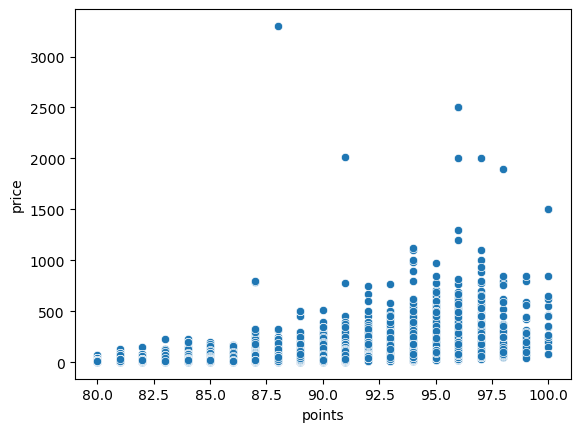

In [ ]:
sns.scatterplot(data=wines_cleaned, y="price_usd", x="points")
plt.show()

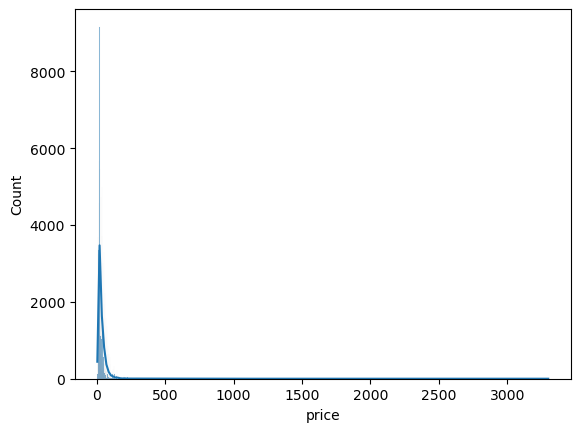

In [ ]:
sns.histplot(data=wines_cleaned, x="price_usd", kde=True)
plt.show()

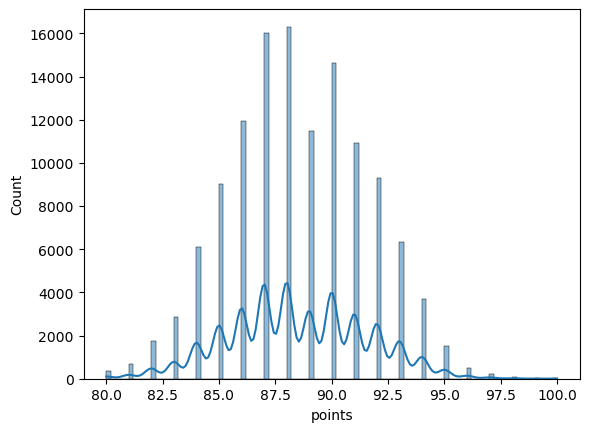

In [98]:
sns.histplot(data=wines_cleaned, x="points", kde=True)
plt.show()

In [87]:
from WinesType import wine_variety_scrapping

In [94]:
wine_variety_scrapping().sample(9)

,variety,wine_type
493,Faberrebe,White
430,Bogdanuša,White
339,Tinta Cão,Red
537,Incrocio Manzoni 1.50,White
33,Barbarossa,Red
147,Golubok,Red
360,Vien De Nus,Red
472,Crouchen,White
566,Mantonico Bianco,White
